# Waiter Tips Prediction

<img src=https://www.thestatesman.com/wp-content/uploads/2018/02/Tip-Waiter.jpg>

<a href ='https://huggingface.co/spaces/ttugba/tiprediction' target=_blank> Waiter Tips Prediction App </a>

#### Column Meanings
total_bill: Total bill in dollars including taxes

tip: Tip given to waiters in dollars

sex: gender of the person paying the bill

smoker: whether the person smoked or not

day: day of the week

time: lunch or dinner

size: number of people in a table 

With this project, our goal is to develop a machine learning model to predict the waiter's tip.

### Import Libraries

In [1]:
import pandas as pd 
pd.set_option("display.max_columns",100)
pd.set_option('display.max_rows',100)

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
df=pd.read_csv('tips.txt')

### Exploratory Data Analysis

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


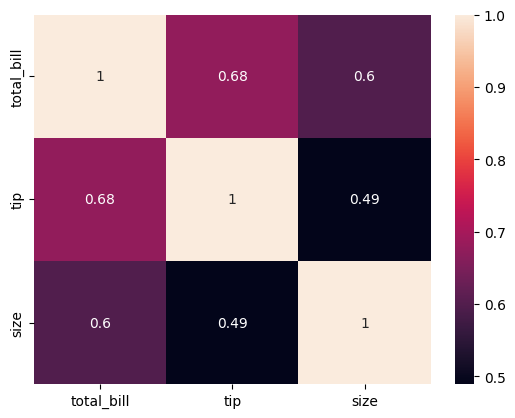

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [10]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [11]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
d={'No':0,'Yes':1}
df['smoker']=df['smoker'].map(d) 

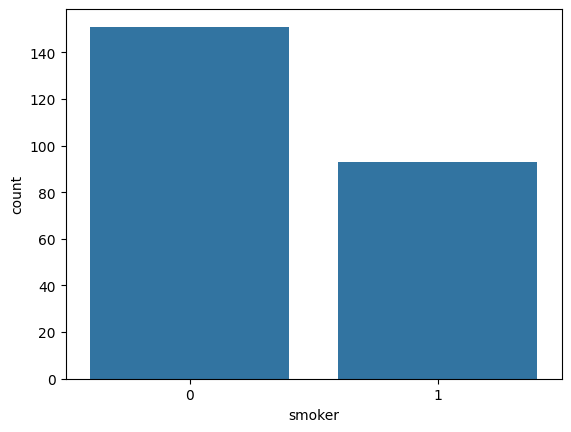

In [13]:
sns.countplot(x='smoker',data=df);

In [14]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

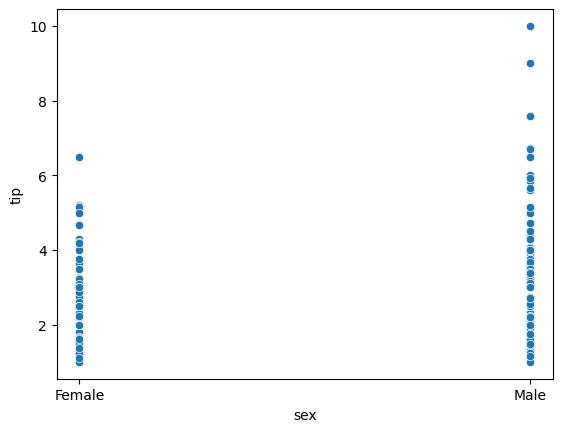

In [15]:
sns.scatterplot(x='sex',y='tip',data=df);

In [16]:
e={'Male':0,'Female':1}
df['sex']=df['sex'].map(e) 

In [17]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
69,15.01,2.09,0,1,Sat,Dinner,2
88,24.71,5.85,0,0,Thur,Lunch,2
163,13.81,2.00,0,0,Sun,Dinner,2
147,11.87,1.63,1,0,Thur,Lunch,2
185,20.69,5.00,0,0,Sun,Dinner,5


In [18]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

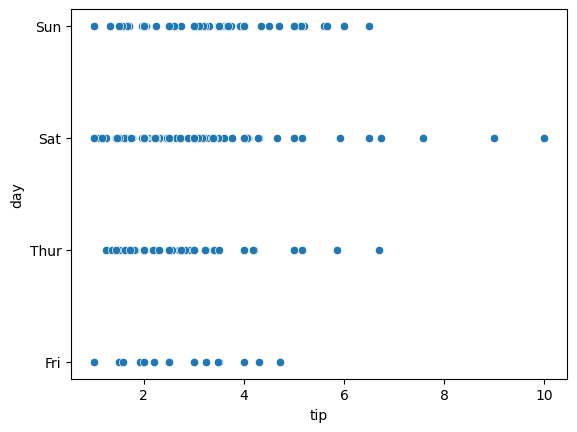

In [19]:
sns.scatterplot(y='day',x='tip',data=df);

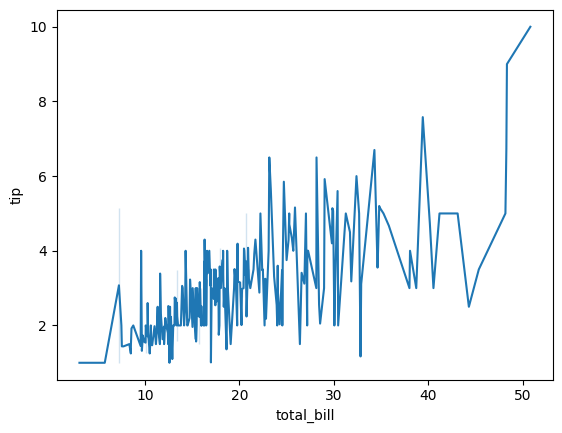

In [20]:
sns.lineplot(x='total_bill',y='tip',data=df);

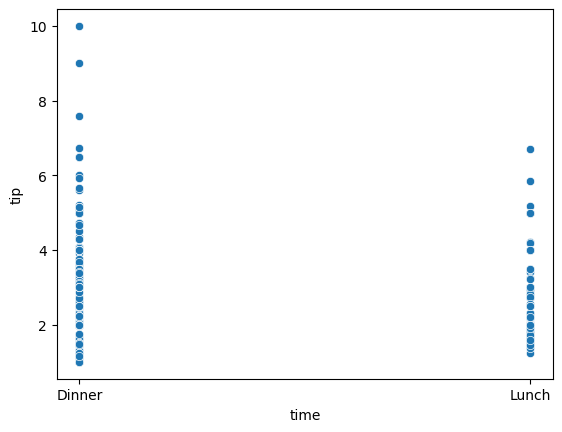

In [21]:
sns.scatterplot(x='time',y='tip',data=df);

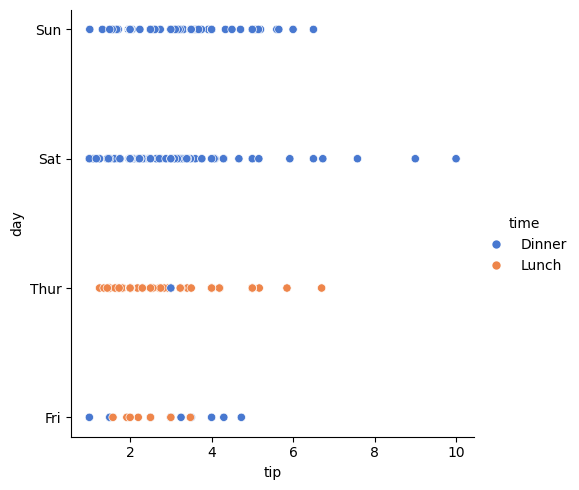

In [22]:
sns.relplot(y='day', x='tip', hue='time', palette='muted', data=df);

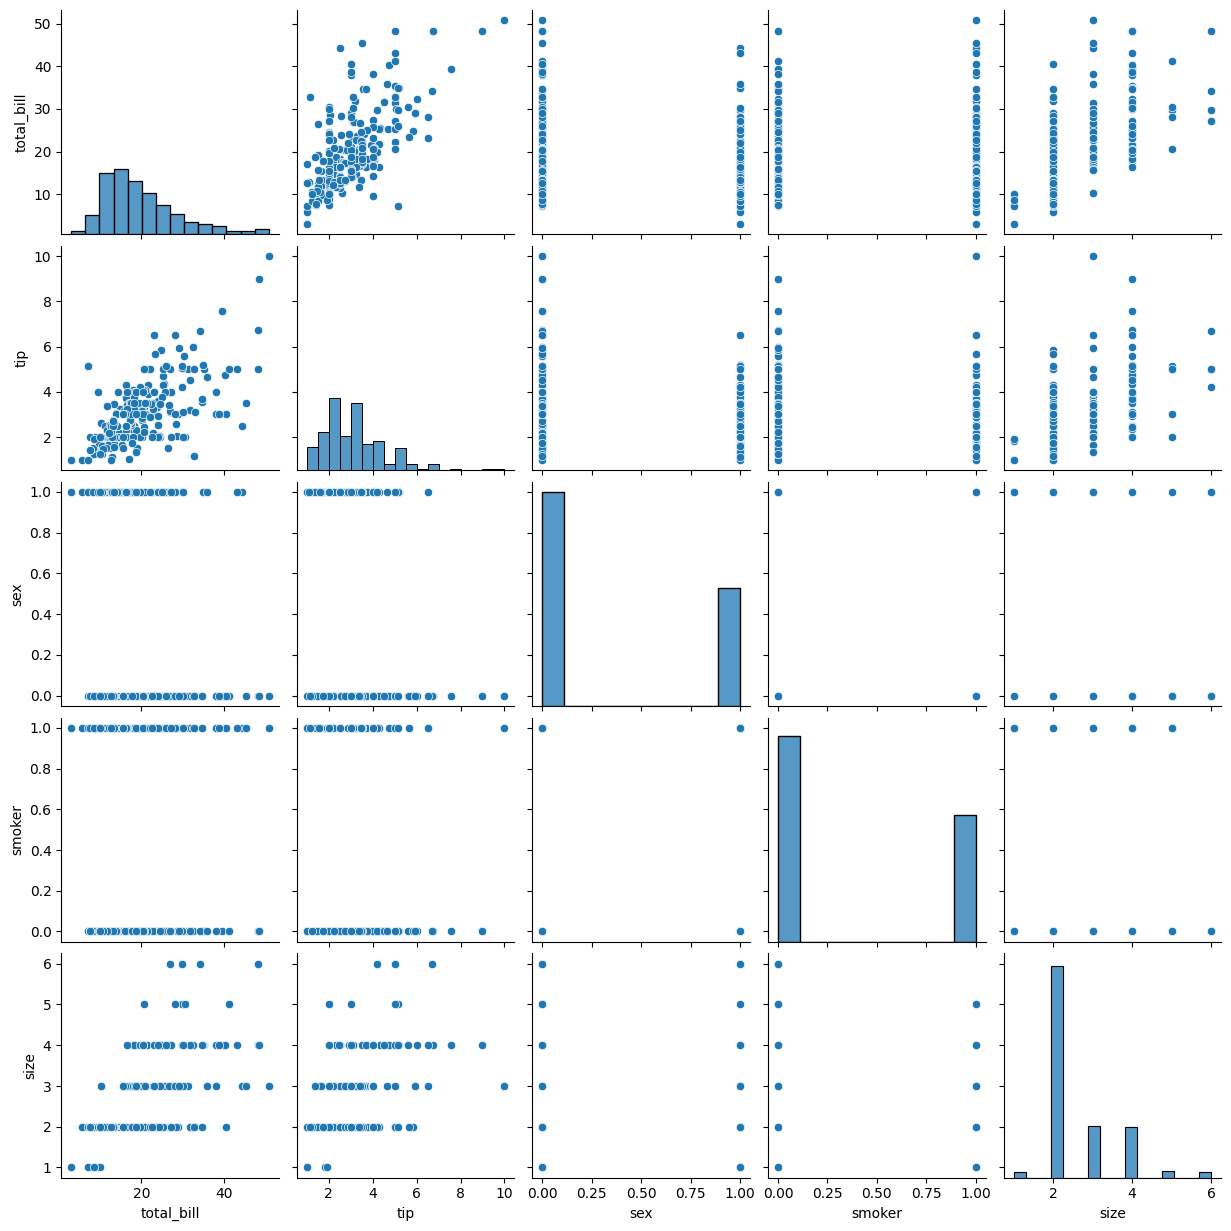

In [23]:
sns.pairplot(df);

In [24]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [25]:
f={'Sun':0, 'Sat':1, 'Thur':2, 'Fri':3}
df['day']=df['day'].map(f) 

In [26]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [27]:
g={'Dinner':0, 'Lunch':1}
df['time']=df['time'].map(g) 

### Feature Engineering & Modelling - Regression

In [28]:
abs(df.corr(numeric_only=True)['tip'].sort_values(ascending=False))

tip           1.000000
total_bill    0.675734
size          0.489299
smoker        0.005929
sex           0.088862
time          0.121629
day           0.138947
Name: tip, dtype: float64

In [29]:
x=df.drop('tip',axis=1)
y=df[['tip']]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
R=Ridge()
L=Lasso()
E=ElasticNet()

In [31]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [32]:
Rmodel=R.fit(x_train, y_train)

In [33]:
Rpredict=Rmodel.predict(x_test)

In [34]:
mean_squared_error(y_test,Rpredict)**.5

0.8323096754642538

In [35]:
r2_score(y_test,Rpredict)

0.4457957788462559

In [36]:
Lmodel=L.fit(x_train, y_train)

In [37]:
Lpredict=Lmodel.predict(x_test)

In [38]:
mean_squared_error(y_test,Lpredict)**.5

0.7527267830168775

In [39]:
r2_score(y_test,Lpredict)

0.5467115210170848

In [40]:
Emodel=E.fit(x_train, y_train)

In [41]:
Epredict=Emodel.predict(x_test)

In [42]:
mean_squared_error(y_test,Epredict)**.5

0.7508771951655774

In [43]:
r2_score(y_test,Epredict)

0.5489364101409275

In [44]:
gb=GradientBoostingRegressor()
gb.fit(x, y)

GradientBoostingRegressor()

In [45]:
gbpredict=gb.predict(x_test)

In [46]:
mean_squared_error(y_test,gbpredict)**.5

0.5206875405676588

In [47]:
r2_score(y_test,gbpredict)

0.7831026159697869

In [48]:
rf=RandomForestRegressor()
rf.fit(x, y)

RandomForestRegressor()

In [49]:
rfpredict=rf.predict(x_test)

In [50]:
mean_squared_error(y_test,rfpredict)**.5

0.33342559094028384

In [51]:
r2_score(y_test,rfpredict)

0.9110598614005713

In [52]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': rf.feature_importances_})

In [53]:
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)

In [54]:
feature_importance

,Feature,Importance
0,total_bill,0.772811
2,smoker,0.068028
5,size,0.060628
3,day,0.057866
1,sex,0.023609
4,time,0.017059


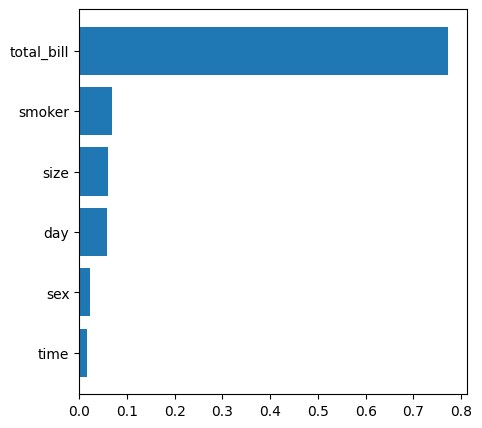

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.barh(feature_importance['Feature'],feature_importance['Importance'])
plt.gca().invert_yaxis()

In [56]:
features=[[29,1,0,2,1,4]]
rf.predict(features)

array([4.4312])

The best performing model, with an R^2 score of 0.9110598614005713, was the Random Forest Regressor. After assessing the importance of the features used to train the model, I made prediction for tip amounts by providing inputs based on those features.

### Save Model

In [58]:
model=rf.fit(x, y)

In [59]:
import pickle 

In [60]:
pickle.dump(model,open('tip.pkl','wb'))